# Importação de Bibliotecas

In [1]:
import time

# Marcar o tempo inicial
start_time = time.time()

In [2]:
# Importação de Bibliotecas
import copy


# Bibliotecas padrão
import random  # Biblioteca para geração de números aleatórios e manipulação de listas aleatoriamente.
# Bibliotecas científicas
import numpy as np  # Biblioteca para manipulação eficiente de arrays multidimensionais e operações matemáticas.
# Bibliotecas para grafos e redes
import networkx as nx  # Biblioteca para criação e manipulação de grafos e redes complexas.
# Bibliotecas de visualização
import matplotlib.pyplot as plt  # Biblioteca para criar gráficos e visualizações.

# Gymnasium - Framework para criação de ambientes de simulação
import gymnasium as gym  # Criação de ambientes de aprendizado por reforço.
from gymnasium import spaces  # Espaços de ação e observação em ambientes Gymnasium.
from stable_baselines3 import PPO  # Importação do algoritmo Proximal Policy Optimization (PPO), usado em aprendizado por reforço para treinar agentes.



# Configuração de Topologia

In [3]:
# --- Configuração da Topologia da Rede ---
def create_network_topology():
    """
    Cria a topologia da rede com nós e conexões.
    Cada nó é representado como uma chave em um dicionário.
    As conexões (arestas) entre os nós incluem atributos, como 'bandwidth' (largura de banda).
    Retorna um dicionário representando a topologia da rede.
    """
    return {
        # Cada nó tem conexões com outros nós especificados no formato:
        # nó_destino: {'bandwidth': valor_da_largura_de_banda}.
        0: {3: {'bandwidth': 1000}},
        1: {2: {'bandwidth': 1000}},
        # O nó 2 está conectado a múltiplos nós (1, 3, 14, 15).
        2: {1: {'bandwidth': 1000}, 3: {'bandwidth': 1000}, 14: {'bandwidth': 1000}, 15: {'bandwidth': 1000}},
        3: {0: {'bandwidth': 1000}, 2: {'bandwidth': 1000}, 4: {'bandwidth': 1000}, 20: {'bandwidth': 1000}},
        # O mesmo padrão é repetido para definir toda a rede.
        # Cada aresta é bidirecional com um atributo de largura de banda (1000).
        # Nós podem ter diferentes números de conexões (graus).
        # Exemplos continuam para os nós 4 a 36...
        4: {3: {'bandwidth': 1000}, 5: {'bandwidth': 1000}},
        5: {4: {'bandwidth': 1000}, 6: {'bandwidth': 1000}},
        6: {5: {'bandwidth': 1000}, 7: {'bandwidth': 1000}},
        7: {6: {'bandwidth': 1000}, 8: {'bandwidth': 1000}, 27: {'bandwidth': 1000}, 29: {'bandwidth': 1000}},
        8: {7: {'bandwidth': 1000}, 9: {'bandwidth': 1000}, 28: {'bandwidth': 1000}},
        9: {8: {'bandwidth': 1000}, 10: {'bandwidth': 1000}},
        10: {9: {'bandwidth': 1000}, 11: {'bandwidth': 1000}},
        11: {10: {'bandwidth': 1000}, 12: {'bandwidth': 1000}, 34: {'bandwidth': 1000}},
        12: {11: {'bandwidth': 1000}, 13: {'bandwidth': 1000}, 31: {'bandwidth': 1000}},
        13: {12: {'bandwidth': 1000}, 14: {'bandwidth': 1000}},
        14: {13: {'bandwidth': 1000}, 2: {'bandwidth': 1000}, 33: {'bandwidth': 1000}, 36: {'bandwidth': 1000}},
        15: {2: {'bandwidth': 1000}, 16: {'bandwidth': 1000}},
        16: {15: {'bandwidth': 1000}, 17: {'bandwidth': 1000}, 25: {'bandwidth': 1000}, 31: {'bandwidth': 1000}},
        17: {16: {'bandwidth': 1000}, 18: {'bandwidth': 1000}},
        18: {17: {'bandwidth': 1000}, 19: {'bandwidth': 1000}, 21: {'bandwidth': 1000}, 24: {'bandwidth': 1000}},
        19: {18: {'bandwidth': 1000}, 20: {'bandwidth': 1000}},
        20: {3: {'bandwidth': 1000}, 19: {'bandwidth': 1000}, 24: {'bandwidth': 1000}},
        21: {18: {'bandwidth': 1000}, 22: {'bandwidth': 1000}},
        22: {21: {'bandwidth': 1000}, 23: {'bandwidth': 1000}, 26: {'bandwidth': 1000}},
        23: {22: {'bandwidth': 1000}, 24: {'bandwidth': 1000}},
        24: {23: {'bandwidth': 1000}, 18: {'bandwidth': 1000}, 20: {'bandwidth': 1000}, 25: {'bandwidth': 1000}},
        25: {24: {'bandwidth': 1000}, 16: {'bandwidth': 1000}, 26: {'bandwidth': 1000}},
        26: {25: {'bandwidth': 1000}, 22: {'bandwidth': 1000}, 32: {'bandwidth': 1000}},
        27: {7: {'bandwidth': 1000}, 28: {'bandwidth': 1000}, 30: {'bandwidth': 1000}},
        28: {27: {'bandwidth': 1000}, 8: {'bandwidth': 1000}},
        29: {7: {'bandwidth': 1000}},
        30: {27: {'bandwidth': 1000}},
        31: {12: {'bandwidth': 1000}, 16: {'bandwidth': 1000}, 32: {'bandwidth': 1000}},
        32: {31: {'bandwidth': 1000}, 26: {'bandwidth': 1000}, 34: {'bandwidth': 1000}, 33: {'bandwidth': 1000}},
        33: {32: {'bandwidth': 1000}, 14: {'bandwidth': 1000}, 35: {'bandwidth': 1000}},
        34: {11: {'bandwidth': 1000}, 32: {'bandwidth': 1000}},
        35: {33: {'bandwidth': 1000}, 36: {'bandwidth': 1000}},
        36: {35: {'bandwidth': 1000}, 14: {'bandwidth': 1000}},
    }


# --- Inicialização do Grafo ---
def initialize_graph(network_topology):
    """
    Inicializa um grafo (Graph) a partir da topologia fornecida.
    Para cada nó e suas conexões, adiciona nós e arestas ao grafo.
    As arestas incluem um atributo de largura de banda ('bandwidth').
    Parâmetros:
        - network_topology: Dicionário contendo a configuração da topologia da rede.
    Retorna:
        - Grafo da biblioteca NetworkX representando a rede.
    """
    G = nx.Graph()  # Cria um grafo vazio.
    for node, edges in network_topology.items():
        # Itera sobre as conexões de cada nó.
        for target, edge_attr in edges.items():
            # Adiciona uma aresta entre o nó atual e o nó de destino com o atributo 'bandwidth'.
            G.add_edge(node, target, bandwidth=edge_attr['bandwidth'])
    return G


# --- Visualização da Topologia ---
def plot_topology(G):
    """
    Gera um gráfico visual da topologia da rede usando Matplotlib e NetworkX.
    Mostra:
        - Nós: representados por círculos.
        - Arestas: representadas por linhas conectando os nós.
        - Atributos de largura de banda: mostrados como rótulos nas arestas.
    Parâmetros:
        - G: Grafo NetworkX representando a topologia da rede.
    """
    pos = nx.spring_layout(G)  # Calcula a posição dos nós para o layout gráfico.
    plt.figure(figsize=(12, 8))  # Define o tamanho da figura.
    nx.draw(
        G, pos, with_labels=True, node_size=500, node_color='lightblue',
        font_size=10, font_weight='bold'  # Estilo dos nós e rótulos.
    )
    # Obtém os rótulos das arestas (atributo 'bandwidth').
    labels = nx.get_edge_attributes(G, 'bandwidth')
    # Desenha os rótulos das arestas no gráfico.
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8)
    plt.title("Topologia da Rede")  # Título do gráfico.
    plt.show()  # Exibe o gráfico.


# --- Recursos dos Servidores ---
def initialize_server_resources(num_nodes):
    """
    Inicializa os recursos de cada servidor na rede.
    Cada servidor possui:
        - 'cpu': Total de recursos de CPU (inicialmente 100 unidades).
        - 'cache': Total de memória cache (inicialmente 100 unidades).
        - 'reuse': Lista para rastrear recursos reutilizáveis, inicialmente vazia.
    Parâmetros:
        - num_nodes: Número total de servidores (nós) na rede.
    Retorna:
        - Dicionário onde cada chave é um identificador de servidor (número do nó),
          e o valor é outro dicionário com os recursos associados.
    """
    return {
        # Para cada nó (de 0 a num_nodes - 1), inicializa os recursos.
        i: {'cpu': 100, 'cache': 100, 'reuse': []}
        for i in range(0, num_nodes)
    }

## Visualização da Topologia 

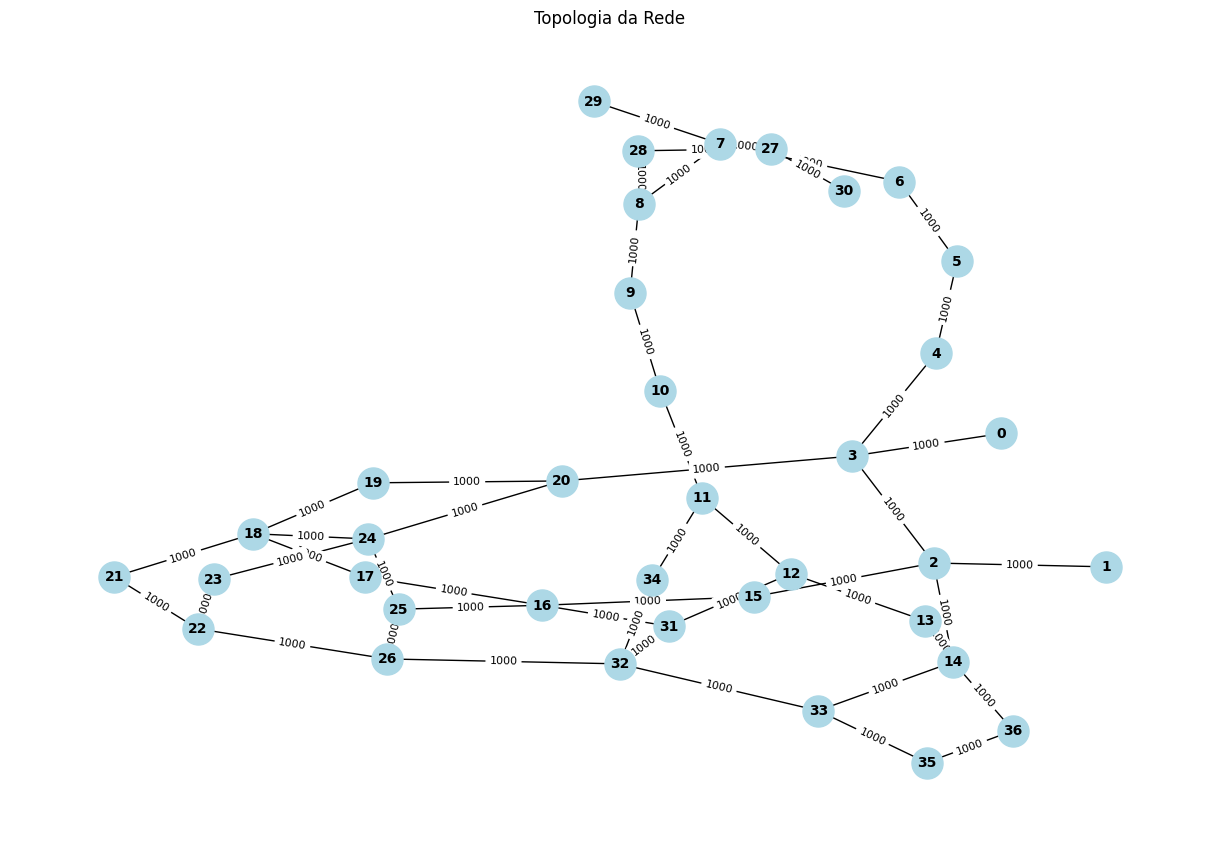

In [4]:
network_topology = create_network_topology()
G = initialize_graph(network_topology)
plot_topology(G)

In [5]:
def find_path_with_bandwidth(graph, source_node, target_node, bandwidth_required, routes=False):
    """
    Encontra o caminho mais curto entre dois nós em um grafo, considerando a largura de banda mínima exigida.

    :param graph: O grafo (NetworkX Graph) com as arestas e seus atributos, incluindo largura de banda.
    :param source_node: O nó inicial de onde começa a busca.
    :param target_node: O nó destino onde a busca termina.
    :param bandwidth_required: A largura de banda mínima necessária para considerar as arestas do caminho.
    :param routes: Se True, ajusta a largura de banda no grafo original após encontrar o caminho.
    :return: O caminho mais curto como uma lista de nós, ou None se não houver caminho disponível.
    """
    try:
        # Filtra as arestas do grafo que possuem largura de banda suficiente
        edges_to_keep = [
            (u, v) for u, v, d in graph.edges(data=True) if d.get('bandwidth', 0) >= bandwidth_required
        ]
        # Cria um subgrafo com apenas as arestas que atendem ao requisito de largura de banda
        filtered_graph = graph.edge_subgraph(edges_to_keep).copy()
        
        # Encontra o caminho mais curto no subgrafo filtrado, com base no peso das arestas
        path = nx.shortest_path(filtered_graph, source=source_node, target=target_node, weight='weight')
        
        if routes:
            # Ajusta a largura de banda das arestas no caminho encontrado
            for i in range(len(path) - 1):
                u, v = path[i], path[i + 1]  # Obtém dois nós consecutivos no caminho
                if graph.has_edge(u, v):  # Verifica se a aresta existe no grafo original
                    # Reduz a largura de banda na aresta (u, v)
                    graph[u][v]['bandwidth'] -= bandwidth_required
                    # Reduz a largura de banda na aresta (v, u), caso o grafo seja bidirecional
                    if graph.has_edge(v, u):
                        graph[v][u]['bandwidth'] -= bandwidth_required
            return path, graph  # Retorna o caminho encontrado e o grafo ajustado
        else:
            return path  # Retorna apenas o caminho encontrado
    except nx.NetworkXNoPath:
        # Lida com o caso em que não há um caminho entre os nós que atenda ao requisito de largura de banda
        print("Não há caminho disponível com a largura de banda necessária.")
        return None
    except nx.NodeNotFound:
        # Lida com o caso em que um ou ambos os nós não estão presentes no grafo
        print("Um ou ambos os nós não foram encontrados no grafo.")
        return None


# Requisitos dos Serviço na Rede

In [6]:
# --- Requisitos dos Serviços ---
# Define os recursos necessários para cada serviço, como CPU, cache e largura de banda.

def generate_random_sfc():
    """
    Gera uma cadeia de funções de serviço (SFC - Service Function Chain) com requisitos de recursos aleatórios.
    Cada função de serviço (SF - Service Function) possui:
        - 'cpu': Quantidade de recursos de CPU exigidos (aleatório entre 10 e 30).
        - 'cache': Quantidade de memória cache exigida (aleatório entre 10 e 30).
        - 'bandwidth_output': Largura de banda de saída exigida (aleatório entre 10 e 30).
        - 'shareable': Indica se o serviço pode ser compartilhado por múltiplos clientes (True ou False).
    O serviço 's4' é uma exceção, pois não exige recursos.

    :return: Um dicionário representando o modelo SFC gerado.
    """
    sfc_model = {
        's0': {'cpu': random.randint(10, 30), 'cache': random.randint(10, 30), 'bandwidth_output': random.randint(10, 30), 'shareable': random.choice([True, False])},
        's1': {'cpu': random.randint(10, 30), 'cache': random.randint(10, 30), 'bandwidth_output': random.randint(10, 30), 'shareable': random.choice([True, False])},
        's2': {'cpu': random.randint(10, 30), 'cache': random.randint(10, 30), 'bandwidth_output': random.randint(10, 30), 'shareable': random.choice([True, False])},
        's3': {'cpu': random.randint(10, 30), 'cache': random.randint(10, 30), 'bandwidth_output': random.randint(10, 30), 'shareable': random.choice([True, False])},
        's4': {'cpu': 0, 'cache': 0, 'bandwidth_output': 0, 'shareable': False}  # Serviço 4 sem requisitos de recursos.
    }
    return sfc_model


def generate_service_requirements(quanti):
    """
    Gera os requisitos de várias cadeias de funções de serviço (SFCs) com base na quantidade especificada.

    Para cada SFC gerada:
        - Atribui um identificador único ('sfc_id').
        - Inclui as funções de serviço (SFs) geradas com recursos aleatórios.
        - Define um servidor aleatório como o último servidor usado pela SFC.

    :param quanti: Quantidade de SFCs a serem geradas.
    :return: Uma lista de dicionários representando as SFCs e seus requisitos.
    """
    # Gera um modelo base de SFC com recursos aleatórios.
    sfc_model = generate_random_sfc()
    # Cria uma lista de SFCs, atribuindo a cada uma um ID único e um servidor aleatório.
    lista = [
        {
            "sfc_id": i,  # Identificador único da SFC.
            "SFs": sfc_model,  # Cadeia de funções de serviço.
            "last_service_server": random.randint(1, len(network_topology) - 1)  # Último servidor usado pela SFC.
        }
        for i in range(quanti)
    ]
    return lista


def visualize_service_requirements(service_requirements):
    """
    Visualiza os requisitos dos serviços gerados de forma organizada.
    Para cada SFC:
        - Exibe o identificador (sfc_id).
        - Lista os requisitos de cada função de serviço (SF).
        - Mostra o último servidor onde a SFC foi processada.

    :param service_requirements: Lista de dicionários contendo os requisitos dos serviços.
    """
    for service in service_requirements:
        # Exibe o identificador da SFC.
        print(f"SFC ID: {service['sfc_id']}")
        # Exibe os recursos exigidos por cada função de serviço (SF).
        for sf, resources in service['SFs'].items():
            print(f"  {sf}: {resources}")
        # Exibe o último servidor associado à SFC.
        print(f"  Último servidor: {service['last_service_server']}")
        # Separador para melhor visualização.
        print("-" * 40)


# Função de Cálculo de Custo

In [7]:
def init_link_usage(G):
    """
    Inicializa o uso dos links na rede.

    Args:
        G (networkx.Graph): Grafo representando a rede.

    Retorna:
        dict: Dicionário onde as chaves são arestas (ordenadas) e os valores são inicializados como 0.
    """
    return {tuple(sorted((u, v))): 0 for u, v in G.edges()}


In [8]:
def calculate_cost(
    chosen_node,
    last_chosen_node,
    server_resources,
    service,
    link_usage,
    G,
    pesos={"cpu": 1, "cache": 1, "bandwidth": 1},
):
    """
    Calcula o custo total de alocação de um serviço em um nó, considerando recursos do servidor, reutilização de serviços
    e uso de links da rede. Penalidades e incentivos são aplicados dependendo das condições.

    :param chosen_node: O nó onde o serviço será alocado.
    :param last_chosen_node: O último nó usado na alocação (para cálculo de custo de links).
    :param server_resources: Dicionário de recursos disponíveis para cada nó (CPU, cache, reutilização).
    :param service: Tupla contendo a chave do serviço e seus requisitos de recursos.
    :param link_usage: Dicionário rastreando o uso de largura de banda nos links da rede.
    :param G: Grafo representando a topologia da rede (NetworkX).
    :param pesos: Dicionário de pesos para CPU, cache e largura de banda nos cálculos de custo.
    :return: Tupla com o custo total, recursos atualizados do servidor e uso atualizado dos links.
    """
    total_cost = 0  # Inicializa o custo total.
    service_key = service[0]  # Identificador da função de serviço (SF).
    service_costs = service[1]  # Requisitos do serviço.

    # Pesos para os recursos nos cálculos de custo.
    peso_cpu = pesos['cpu']
    peso_cache = pesos['cache']
    peso_bandwidth = pesos['bandwidth']

    # Verifica se o serviço ainda não está em reuso no nó escolhido.
    if service_key not in server_resources[chosen_node]["reuse"]:
        # Verifica se o nó possui recursos suficientes para atender ao serviço.
        if (
            server_resources[chosen_node]['cpu'] <= service_costs['cpu'] or
            server_resources[chosen_node]['cache'] <= service_costs['cache'] or
            server_resources[chosen_node]['cpu'] - service_costs['cpu'] < 5 or
            server_resources[chosen_node]['cache'] - service_costs['cache'] < 5
        ):
            # Retorna custo infinito caso os recursos sejam insuficientes.
            return float('inf'), server_resources, link_usage

        # Custo baseado na proporção de recursos consumidos.
        total_cost += (
            (service_costs['cpu'] / server_resources[chosen_node]['cpu'] + 1) ** peso_cpu +
            (service_costs['cache'] / server_resources[chosen_node]['cache'] + 1) ** peso_cache
        )
        # Atualiza os recursos disponíveis no nó após a alocação do serviço.
        server_resources[chosen_node]['cpu'] -= service_costs['cpu']
        server_resources[chosen_node]['cache'] -= service_costs['cache']

        # Se o serviço for compartilhável, adiciona à lista de reutilização do nó.
        if service_costs["shareable"]:
            server_resources[chosen_node]["reuse"].append(service_key)
    else:
        # Incentivo para reutilizar serviços já alocados no nó.
        total_cost -= 5

    # Penalidade para evitar o uso de um nó especial (pseudo cloud) representado por '0'.
    if chosen_node == 0:
        total_cost += 50

    # Cálculo do custo de uso de links (entre o nó atual e o último nó).
    if chosen_node != last_chosen_node and last_chosen_node is not None:
        try:
            bandwidth_required = service_costs['bandwidth_output']
            # Busca o caminho com largura de banda suficiente entre os nós.
            path = find_path_with_bandwidth(G, last_chosen_node, chosen_node, bandwidth_required)
            for j in range(len(path) - 1):
                u, v = path[j], path[j + 1]
                edge = tuple(sorted((u, v)))  # Ordena os nós para evitar duplicação.
                # Atualiza o uso de largura de banda nos links do caminho.
                link_usage[edge] = link_usage.get(edge, 0) + bandwidth_required
                total_cost += peso_bandwidth * 1  # Incrementa o custo com base no peso da largura de banda.
        except nx.NetworkXNoPath:
            # Retorna custo infinito se não houver caminho disponível com largura de banda suficiente.
            print("Estourou largura de banda")
            return float('inf'), server_resources, link_usage

    return total_cost, server_resources, link_usage


# Classe de Representação e Manipulação de Ambiente

In [39]:
class NetworkEnv(gym.Env):
    """
    Ambiente de rede baseado no Gym para simular alocação de serviços em uma topologia de rede.
    """

    def __init__(self, num_nodes, graph, service_requirements, pesos=None, num_scenarios=1):
        """
        Inicializa o ambiente de rede.

        Args:
            num_nodes (int): Número de nós na rede.
            graph (networkx.Graph): Grafo representando a topologia da rede.
            service_requirements (list): Lista de SFCs (cadeias de funções de serviço) e seus requisitos.
            pesos (dict, opcional): Pesos para CPU, cache e largura de banda. Padrão: {"cpu": 1, "cache": 1, "bandwidth": 1}.
            num_scenarios (int): Número de cenários predefinidos.
        """
        super().__init__()
        self.num_nodes = num_nodes  # Número total de nós na rede.
        self.service_requirements = service_requirements  # Lista de SFCs e requisitos de serviços.
        self.current_sfc_index = 0  # Índice da SFC atualmente sendo processada.
        self.current_service_index = 0  # Índice da função de serviço atual na SFC.
        self.last_chosen_node = None  # Último nó selecionado para alocação.
        self.pesos = pesos or {"cpu": 1, "cache": 1, "bandwidth": 1}  # Pesos dos custos.
        self.G = graph  # Grafo representando a topologia da rede.
        self.link_usage = init_link_usage(self.G)  # Inicializa o uso de links da rede.
        self.allproposta = []  # Histórico de todas as alocações realizadas.
        self.proposta = []  # Alocação atual.
        self.show_resources = True  # Indica se os recursos devem ser exibidos durante a execução.
        self.totalreward = 0  # Recompensa acumulada.

         # Inicializa os recursos dos servidores.
        self.server_resources = self.initialize_server_resources(num_nodes)

        # Define o espaço de observação (estado do ambiente).
        num_services = max(len(sfc["SFs"]) for sfc in self.service_requirements)  # Determina o maior número de SFs em uma SFC.
        self.observation_space = spaces.Box(
            low=0.0,
            high=1.0,
            shape=(num_nodes * 2 + num_nodes + 2 * len(self.service_requirements[0]["SFs"]),),  # Dimensão do estado.
            dtype=np.float32
        )

        # Define o espaço de ação (nós disponíveis para escolha).
        self.action_space = spaces.Discrete(num_nodes)

        # Predefine cenários de serviço.
        self.predefined_scenarios = [service_requirements]
        for _ in range(1, num_scenarios):
            self.predefined_scenarios.append(generate_service_requirements(len(service_requirements)))

        self.current_scenario_index = 0  # Índice do cenário atual.


    def initialize_server_resources(self, num_nodes):
        """
        Inicializa os recursos de todos os nós da rede.

        Args:
            num_nodes (int): Número de nós na rede.

        Returns:
            dict: Dicionário contendo recursos iniciais (CPU, cache e SFs reutilizáveis) de cada nó.
        """
        return {
            i: {'cpu': 100, 'cache': 100, 'reuse': []}
            for i in range(0, num_nodes)
        }

    def reset(self, seed=None, options=None):
        """
        Reseta o ambiente para o estado inicial, reinicializando todos os recursos.

        Args:
            seed (int, opcional): Semente para geração de números aleatórios.
            options (dict, opcional): Parâmetros adicionais.

        Returns:
            tuple: Estado inicial normalizado e informações adicionais.
        """
        # Reinicia recursos dos servidores e uso de links.
        self.server_resources = self.initialize_server_resources(self.num_nodes)
        self.link_usage = init_link_usage(self.G)
        self.current_sfc_index = 0
        self.current_service_index = 0
        self.last_chosen_node = None
        self.proposta = []
        self.allproposta = []

        # Escolhe aleatoriamente um dos cenários predefinidos.
        self.current_scenario_index = random.randint(0, len(self.predefined_scenarios) - 1)
        self.service_requirements = self.predefined_scenarios[self.current_scenario_index]
        self.totalreward = 0

        return self.get_normalized_state(), {}


    def step(self, action):
        """
        Executa uma ação no ambiente, atualizando o estado e calculando recompensas.

        Args:
            action (int): Índice do nó escolhido para alocação.

        Returns:
            tuple: Novo estado, recompensa, indicador de finalização, e informações adicionais.
        """
        reward = 0
        if not 0 <= action < self.num_nodes:
            raise ValueError(f"Ação inválida: {action}. Deve estar entre 0 e {self.num_nodes - 1}.")

        chosen_node = int(action)  # Nó escolhido para alocação.
        current_sfc = self.service_requirements[self.current_sfc_index]  # SFC atual.
        current_service_key = f"s{self.current_service_index}"  # Chave do serviço atual.
        service = (current_service_key, current_sfc["SFs"][current_service_key])  # Requisitos do serviço.

        # Penalidade/recompensa para alocação do último serviço em um nó específico.
        last_service_key, _ = list(current_sfc["SFs"].items())[-1]
        if current_service_key == last_service_key and chosen_node != current_sfc["last_service_server"]:
            chosen_node = current_sfc["last_service_server"]
            reward = -15
        if current_service_key == last_service_key and chosen_node == current_sfc["last_service_server"]:
            reward = 15

        self.proposta.append(chosen_node)
        done = False

        if self.current_sfc_index >= len(self.service_requirements):
            done = True
            return self.get_normalized_state(), 0, done, False, {}

        # Calcula o custo da alocação e atualiza os recursos.
        cost, self.server_resources, self.link_usage = calculate_cost(
            chosen_node,
            self.last_chosen_node,
            self.server_resources,
            service,
            self.link_usage,
            self.G,
            self.pesos
        )

        if cost == float('inf'):
            # Penalidade por falha na alocação.
            reward = -50 * len(self.service_requirements)
            done = True
        else:
            reward = -cost if not reward else (reward - cost)
            self.last_chosen_node = chosen_node

            # Avança para o próximo serviço da SFC.
            self.current_service_index += 1
            if self.current_service_index >= len(current_sfc["SFs"]):
                self.allproposta.append(self.proposta)
                self.proposta = []
                self.current_sfc_index += 1
                self.current_service_index = 0

        # Finaliza o ambiente se todas as SFCs forem processadas.
        done = done or self.current_sfc_index >= len(self.service_requirements)

        state = self.get_normalized_state()
        self.totalreward = reward
        return state, reward, done, False, {}

    def get_normalized_state(self):
        """
        Normaliza os recursos dos servidores e adiciona informações relevantes ao estado.

        Returns:
            np.ndarray: Vetor de estado normalizado.
        """
        state = []

        # Normaliza os recursos dos servidores (CPU e Cache)
        for node_id, resources in self.server_resources.items():
            cpu = resources['cpu']
            cache = resources['cache']
            state.append(cpu / 100 if cpu > 0 else 0)  # CPU disponível
            state.append(cache / 100 if cache > 0 else 0)  # Cache disponível

        # Adiciona informações do último servidor e reutilização de SFs.
        # ... (mantém a lógica existente).

        # Adiciona a codificação one-hot para o último servidor usado (last_service_server)
        if self.current_sfc_index < len(self.service_requirements):
            last_service_server = self.service_requirements[self.current_sfc_index]["last_service_server"]
            one_hot_server = [1 if i == last_service_server else 0 for i in range(1, self.num_nodes + 1)]
            state.extend(one_hot_server)

            # Adiciona as SFs que podem ser reutilizadas
            current_sfc = self.service_requirements[self.current_sfc_index]
            reuse_vector = []
            for sf_key, sf in current_sfc["SFs"].items():
                reuse_vector.append(1 if sf["shareable"] and sf_key in self.server_resources[last_service_server]["reuse"] else 0)
            state.extend(reuse_vector)

            # Adiciona a SF atual como codificação one-hot
            num_sfs = len(current_sfc["SFs"])
            current_service_key = f"s{self.current_service_index}"
            sf_one_hot = [1 if i == self.current_service_index else 0 for i in range(num_sfs)]
            state.extend(sf_one_hot)


        else:
            # Caso inválido, preenche com zeros para manter o formato consistente
            num_sfs = len(self.service_requirements[self.current_sfc_index - 1]["SFs"]) if self.current_sfc_index > 0 else 0
            state.extend([0] * (self.num_nodes + num_sfs + num_sfs))

        return np.array(state, dtype=np.float32)




    def render(self):
        """
        Exibe os recursos dos nós e uso de links para depuração.
        """
        if self.show_resources:
          print("Recursos dos nós:")
          for node_id, resources in self.server_resources.items():
              print(f"Nó {node_id}: {resources}")
          print("Uso de links:")
          print(self.link_usage)

    def close(self):
        """
        Fecha o ambiente (não implementado).
        """
        pass

    def get_routes(self):
        routes = {}
        graph = G.copy()  # Cria uma cópia do grafo original
    
        for index_SFC, allocation_SFC in enumerate(self.allproposta):
            # Inicializa o dicionário para a SFC atual
            routes[f"SFC_{index_SFC}"] = {}
    
            for i, node in enumerate(allocation_SFC):
                # Validações
                if not allocation_SFC:
                    print(f"SFC_{index_SFC} está vazia.")
                    continue
                if node not in graph:
                    print(f"Nó {node} não existe no grafo para SFC_{index_SFC}, SF_{i}.")
                    continue
    
                # Determina a largura de banda necessária
                if "SFs" not in self.service_requirements[0] or f"s{i}" not in self.service_requirements[0]["SFs"]:
                    print(f"Requisitos de serviço ausentes para SFC_{index_SFC}, SF_{i}.")
                    continue
                
                
                source_node = 0 if i == 0 else allocation_SFC[i - 1]
                bandwidth_required = 0 if source_node == 0 else self.service_requirements[0]["SFs"][f"s{i}"]["bandwidth_output"]
                target_node = node
    
                # Encontra o caminho mais curto no grafo filtrado
                try:
                    path, graph = find_path_with_bandwidth(graph, source_node, target_node, bandwidth_required, routes=True)
                    if path is None:
                        print(f"Não foi possível encontrar caminho para SFC_{index_SFC}, SF_{i}.")
                        continue
                    routes[f"SFC_{index_SFC}"][f"SF_{i}"] = path
                except Exception as e:
                    print(f"Erro ao calcular a rota para SFC_{index_SFC}, SF_{i}: {e}")
                    continue
    
        return routes

# Criação do modelo e preparo para coleta de dados

In [10]:
from stable_baselines3.common.callbacks import BaseCallback
import matplotlib.pyplot as plt
import numpy as np

class RewardTrackingCallback(BaseCallback):
    """
    Callback para rastrear recompensas durante o treinamento.
    """
    def __init__(self, log_interval=100, verbose=0):
        super(RewardTrackingCallback, self).__init__(verbose)
        self.log_interval = log_interval
        self.episode_rewards = []  # Armazena recompensas por episódio
        self.logged_rewards = []  # Armazena recompensas médias a cada log_interval episódios
        self.current_reward = 0   # Recompensa acumulada no episódio atual

    def _on_step(self) -> bool:
        # Atualiza a recompensa acumulada do episódio
        self.current_reward += self.locals["rewards"]

        # Verifica se o episódio terminou
        if self.locals["dones"]:
            self.episode_rewards.append(self.current_reward)

            # Calcula a recompensa média a cada log_interval episódios
            if len(self.episode_rewards) % self.log_interval == 0:
                avg_reward = np.mean(self.episode_rewards[-self.log_interval:])
                self.logged_rewards.append(avg_reward)

            # Reseta a recompensa acumulada para o próximo episódio
            self.current_reward = 0

        return True  # Continua o treinamento

    def plot_rewards(self):
        """
        Exibe um gráfico da evolução das recompensas médias.
        """
        if not self.logged_rewards:
            print("Nenhuma recompensa registrada ainda.")
            return

        plt.figure(figsize=(10, 5))
        plt.plot(
            range(0, len(self.logged_rewards) * self.log_interval, self.log_interval),
            self.logged_rewards,
            label="Recompensa Média"
        )
        plt.xlabel(f"Episódios (a cada {self.log_interval})")
        plt.ylabel("Recompensa Média")
        plt.title("Evolução das Recompensas Durante o Treinamento")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()


In [11]:
from stable_baselines3.common.env_checker import check_env

# Criação do ambiente
env = NetworkEnv(
    num_nodes=37,
    graph=initialize_graph(create_network_topology()),
    service_requirements=generate_service_requirements(2)
)

# Verifica a conformidade do ambiente
check_env(env, warn=True)


In [12]:
# Geração dos requisitos das SFCs
num_sfcs = 8
service_requirements = generate_service_requirements(num_sfcs)

# Número de nós na rede
num_nodes = len(network_topology)

# Inicialização do ambiente
env = NetworkEnv(num_nodes=num_nodes, graph=G, service_requirements=service_requirements, pesos={"cpu": 1.0, "cache": 1.0, "bandwidth": 1.0}, num_scenarios=10)

# Criar o callback para rastrear recompensas
reward_callback = RewardTrackingCallback(log_interval=2000)  # Ajuste o log_interval conforme necessário

# Configuração e treinamento do modelo
model = PPO("MlpPolicy", env, verbose=0, learning_rate=0.0003, batch_size=64, n_steps=4096)
model.learn(total_timesteps=60*144000, callback=reward_callback)
model.save("ppo_sfc_allocation")


# Teste do modelo treinado
model = PPO.load("ppo_sfc_allocation")

# Extrai apenas o estado do reset
state, _ = env.reset()  # Desempacota a tupla (obs, info)
done = False

while not done:
    action, _ = model.predict(state)
    state, reward, done, _, _ = env.step(action)
    
env.render()
print(env.allproposta)


Recursos dos nós:
Nó 0: {'cpu': 100, 'cache': 100, 'reuse': []}
Nó 1: {'cpu': 100, 'cache': 100, 'reuse': []}
Nó 2: {'cpu': 43, 'cache': 46, 'reuse': []}
Nó 3: {'cpu': 49, 'cache': 45, 'reuse': []}
Nó 4: {'cpu': 100, 'cache': 100, 'reuse': []}
Nó 5: {'cpu': 100, 'cache': 100, 'reuse': []}
Nó 6: {'cpu': 100, 'cache': 100, 'reuse': []}
Nó 7: {'cpu': 100, 'cache': 100, 'reuse': []}
Nó 8: {'cpu': 100, 'cache': 100, 'reuse': []}
Nó 9: {'cpu': 100, 'cache': 100, 'reuse': []}
Nó 10: {'cpu': 100, 'cache': 100, 'reuse': []}
Nó 11: {'cpu': 74, 'cache': 86, 'reuse': []}
Nó 12: {'cpu': 18, 'cache': 14, 'reuse': []}
Nó 13: {'cpu': 100, 'cache': 100, 'reuse': []}
Nó 14: {'cpu': 46, 'cache': 62, 'reuse': []}
Nó 15: {'cpu': 16, 'cache': 11, 'reuse': []}
Nó 16: {'cpu': 16, 'cache': 28, 'reuse': []}
Nó 17: {'cpu': 74, 'cache': 86, 'reuse': []}
Nó 18: {'cpu': 100, 'cache': 100, 'reuse': []}
Nó 19: {'cpu': 100, 'cache': 100, 'reuse': []}
Nó 20: {'cpu': 33, 'cache': 43, 'reuse': []}
Nó 21: {'cpu': 100, 'ca

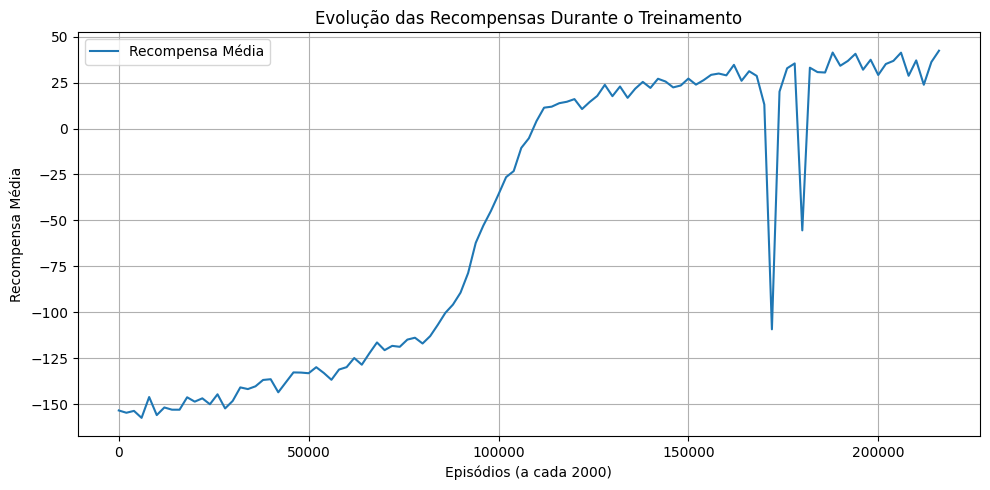

In [13]:
# Exibe o gráfico das recompensas acumuladas
reward_callback.plot_rewards()


In [14]:

state, _ = env.reset()  # Desempacota a tupla (obs, info)
done = False

while not done:
    action, _ = model.predict(state)
    state, reward, done, _, _ = env.step(action)
    # env.render()
print(env.allproposta)
print(env.totalreward)
visualize_service_requirements(env.service_requirements)
print(env.totalreward)



[[2, 15, 16, 15, 34], [2, 15, 16, 15, 11], [2, 32, 16, 15, 24], [2, 15, 16, 15, 15], [2, 16, 16, 15, 12], [2, 2, 16, 15, 1], [2, 32, 16, 15, 18], [2, 16, 16, 15, 9]]
7.0
SFC ID: 0
  s0: {'cpu': 22, 'cache': 22, 'bandwidth_output': 12, 'shareable': True}
  s1: {'cpu': 19, 'cache': 12, 'bandwidth_output': 20, 'shareable': False}
  s2: {'cpu': 16, 'cache': 29, 'bandwidth_output': 20, 'shareable': True}
  s3: {'cpu': 11, 'cache': 22, 'bandwidth_output': 28, 'shareable': True}
  s4: {'cpu': 0, 'cache': 0, 'bandwidth_output': 0, 'shareable': False}
  Último servidor: 34
----------------------------------------
SFC ID: 1
  s0: {'cpu': 22, 'cache': 22, 'bandwidth_output': 12, 'shareable': True}
  s1: {'cpu': 19, 'cache': 12, 'bandwidth_output': 20, 'shareable': False}
  s2: {'cpu': 16, 'cache': 29, 'bandwidth_output': 20, 'shareable': True}
  s3: {'cpu': 11, 'cache': 22, 'bandwidth_output': 28, 'shareable': True}
  s4: {'cpu': 0, 'cache': 0, 'bandwidth_output': 0, 'shareable': False}
  Último 

In [15]:
print(env.get_routes())

{'SFC_0': {'SF_0': [0, 3, 2], 'SF_1': [2, 15], 'SF_2': [15, 16], 'SF_3': [16, 15], 'SF_4': [15, 16, 31, 32, 34]}, 'SFC_1': {'SF_0': [0, 3, 2], 'SF_1': [2, 15], 'SF_2': [15, 16], 'SF_3': [16, 15], 'SF_4': [15, 16, 31, 12, 11]}, 'SFC_2': {'SF_0': [0, 3, 2], 'SF_1': [2, 14, 33, 32], 'SF_2': [32, 31, 16], 'SF_3': [16, 15], 'SF_4': [15, 16, 25, 24]}, 'SFC_3': {'SF_0': [0, 3, 2], 'SF_1': [2, 15], 'SF_2': [15, 16], 'SF_3': [16, 15], 'SF_4': [15]}, 'SFC_4': {'SF_0': [0, 3, 2], 'SF_1': [2, 15, 16], 'SF_2': [16], 'SF_3': [16, 15], 'SF_4': [15, 16, 31, 12]}, 'SFC_5': {'SF_0': [0, 3, 2], 'SF_1': [2], 'SF_2': [2, 15, 16], 'SF_3': [16, 15], 'SF_4': [15, 2, 1]}, 'SFC_6': {'SF_0': [0, 3, 2], 'SF_1': [2, 14, 33, 32], 'SF_2': [32, 31, 16], 'SF_3': [16, 15], 'SF_4': [15, 16, 17, 18]}, 'SFC_7': {'SF_0': [0, 3, 2], 'SF_1': [2, 15, 16], 'SF_2': [16], 'SF_3': [16, 15], 'SF_4': [15, 16, 31, 12, 11, 10, 9]}}


In [38]:
# Inicialização do ambiente



new_env = NetworkEnv(num_nodes=num_nodes, graph=G, service_requirements=service_requirements, pesos={"cpu": 1.0, "cache": 1.0, "bandwidth": 1.0}, num_scenarios=1)
model = PPO.load("ppo_sfc_allocation")

# Extrai apenas o estado do reset
state, _ = env.reset()  # Desempacota a tupla (obs, info)
done = False

while not done:
    action, _ = model.predict(state)
    state, reward, done, _, _ = new_env.step(action)

print(new_env.allproposta)
print(new_env.totalreward)
visualize_service_requirements(service_requirements)
  

    



AQUIIIII
AQUIIIII
AQUIIIII
AQUIIIII
AQUIIIII
AQUIIIII
AQUIIIII
AQUIIIII
AQUIIIII
AQUIIIII
AQUIIIII
AQUIIIII
AQUIIIII
AQUIIIII
AQUIIIII
AQUIIIII
AQUIIIII
AQUIIIII
AQUIIIII
AQUIIIII
AQUIIIII
AQUIIIII
AQUIIIII
AQUIIIII
AQUIIIII
AQUIIIII
AQUIIIII
AQUIIIII
AQUIIIII
AQUIIIII
AQUIIIII
AQUIIIII
AQUIIIII
AQUIIIII
AQUIIIII
AQUIIIII
AQUIIIII
AQUIIIII
AQUIIIII
AQUIIIII
[[2, 32, 16, 15, 20], [2, 32, 16, 15, 14], [2, 32, 16, 15, 9], [2, 32, 32, 15, 17], [2, 14, 14, 3, 7], [2, 32, 31, 12, 26], [2, 32, 24, 15, 32], [2, 17, 31, 12, 21]]
8.0
SFC ID: 0
  s0: {'cpu': 15, 'cache': 12, 'bandwidth_output': 29, 'shareable': True}
  s1: {'cpu': 10, 'cache': 24, 'bandwidth_output': 13, 'shareable': True}
  s2: {'cpu': 23, 'cache': 25, 'bandwidth_output': 23, 'shareable': False}
  s3: {'cpu': 13, 'cache': 11, 'bandwidth_output': 30, 'shareable': False}
  s4: {'cpu': 0, 'cache': 0, 'bandwidth_output': 0, 'shareable': False}
  Último servidor: 20
----------------------------------------
SFC ID: 1
  s0: {'cpu': 15,

In [16]:
# Marcar o tempo final
end_time = time.time()

# Calcular o tempo de execução
execution_time = end_time - start_time
print(f"Tempo de execução: {execution_time:.4f} segundos")

Tempo de execução: 3569.5191 segundos
